<a href="https://colab.research.google.com/github/RazzaTitian/proyek-bangkit/blob/main/Proyek%20Analisis%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality Database
- **Nama:** Muhammad Razza Titian Jiwani
- **Email:** m008d4ky3036@bangkit.academy
- **ID Dicoding:** razzatitian

## Menentukan Pertanyaan Bisnis

- Across the years, which year shows the highest level of both PM2.5 and PM10?
- Is there a relevance between pollutants level and meteorological conditions on a specific period?

## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

## Data Wrangling

### Gathering Data

In this part, it's pretty much just defining the file paths for ease of access. This code separates each data by the underscores.

In [35]:
file_path = [
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

data_frames = {name.split('_')[2]: pd.read_csv(name) for name in file_path}

#Uncomment this line to check if the above code works
#check = list(data_frames.keys())[0]
#data_frames[check].head()

### Assessing Data

Here, we will assess the data. Is there any missing numbers? What data types are there? Any duplicates? These are valid questions one must be aware of, considering the implication. I gave the summary for ease of reading. Next step, of course, is to eliminate (if any) the missing numbers and duplicates. Why the f? It's format. Formatted string. Helps with variable-inserted string.

In [36]:
for station, df in data_frames.items():
    print(f"--- {station} Station ---")
    # Checks missingno
    # Pokemon reference, I know
    print("Missing:")
    print(df.isnull().sum())
    print("\n")

    # Gives the data types of each station
    print("Data Types:")
    print(df.dtypes)
    print("\n")

    # Look for duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of duplicates: {duplicates}")
    print("\n")

    # Provide summary
    print("Summary:")
    print(df.describe())
    print("\n\n")

--- Aotizhongxin Station ---
Missing:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


Data Types:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


Number of duplicates: 0


Summary:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.2492

### Cleaning Data

In [37]:
def outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: df[column].median() if x < lower_bound or x > upper_bound else x)

def clean_air_quality_data(df):

    # Handle missing values
    for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
        df[col].fillna(df[col].median(), inplace=True)

    # Convert date and time
    df['date_time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

    # Impute wind direction
    if 'wd' in df.columns:
        df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Outlier handling
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    for pollutant in pollutants:
        outliers(df, pollutant)

    return df

for station in data_frames:
    data_frames[station] = clean_air_quality_data(data_frames[station])

## Exploratory Data Analysis (EDA)

### Explore ...

**We're checking the data for things that might help us answer the questions listed above, e.g. PM levels**

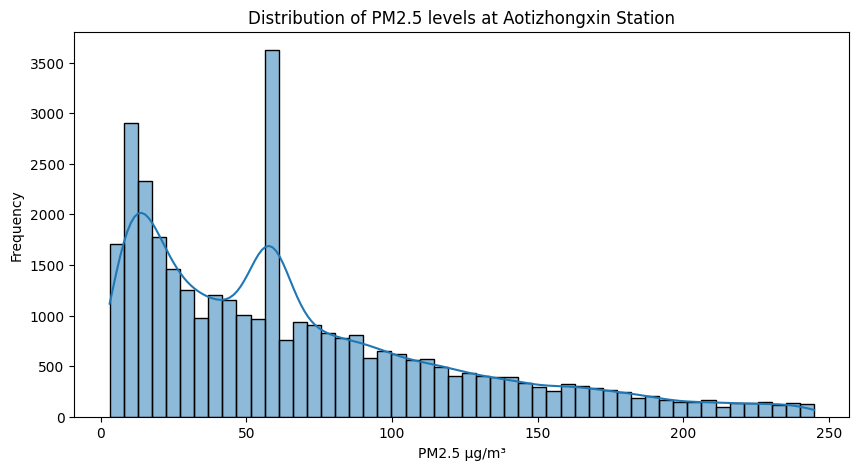

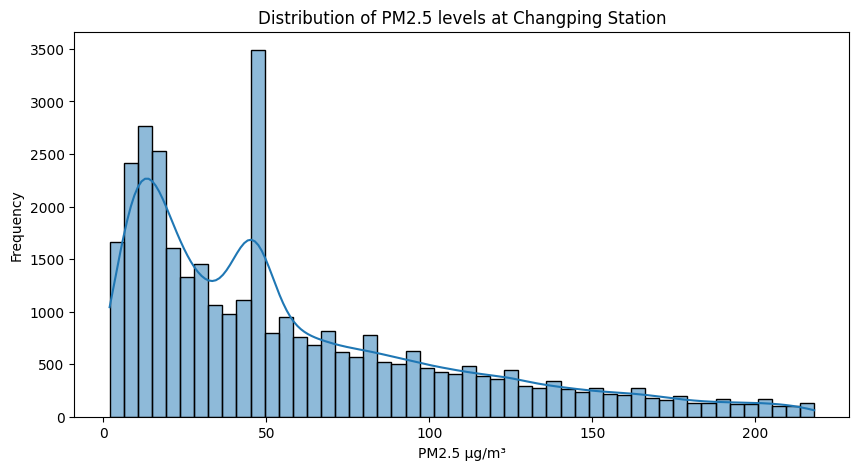

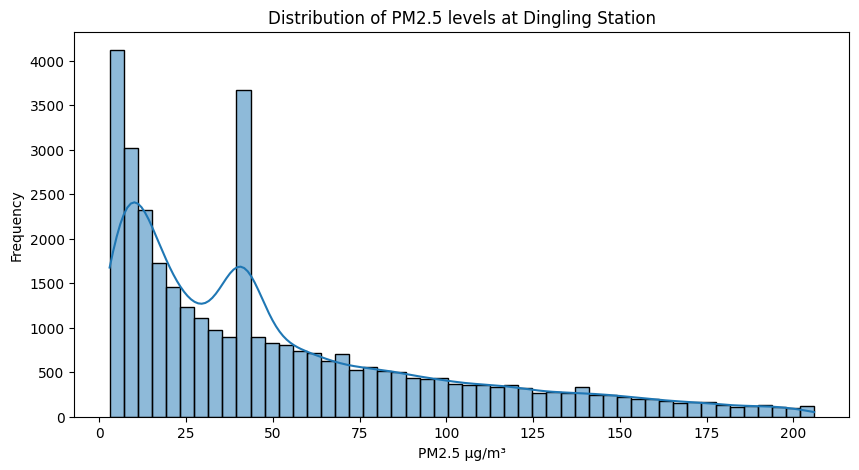

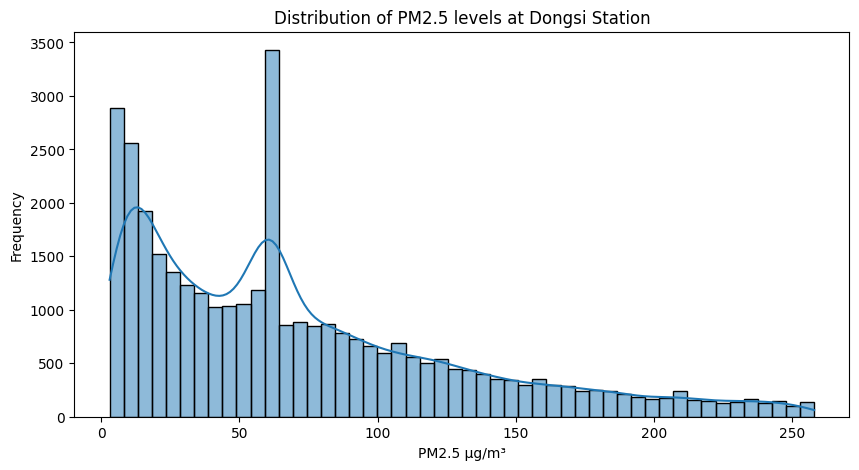

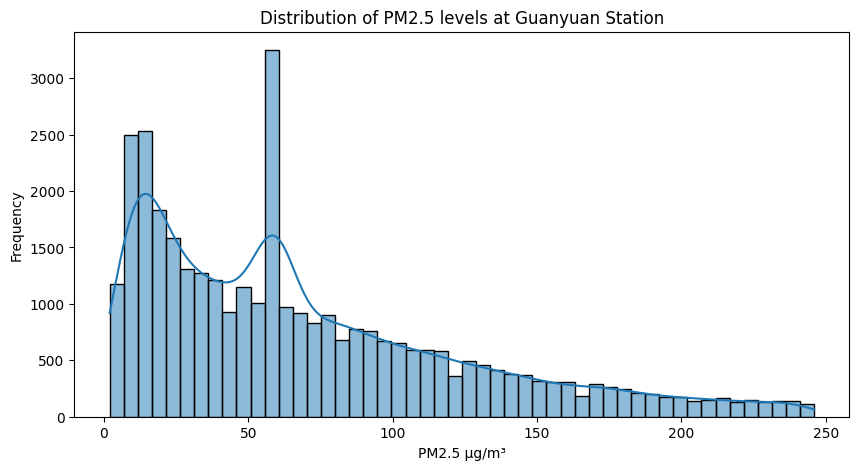

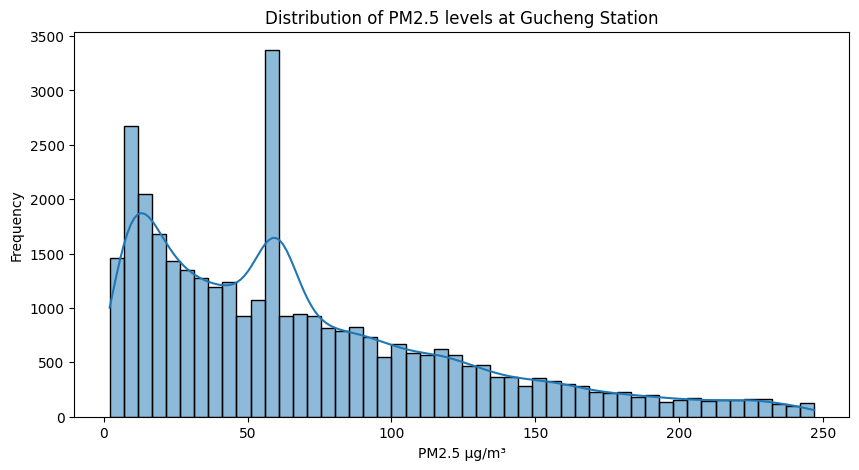

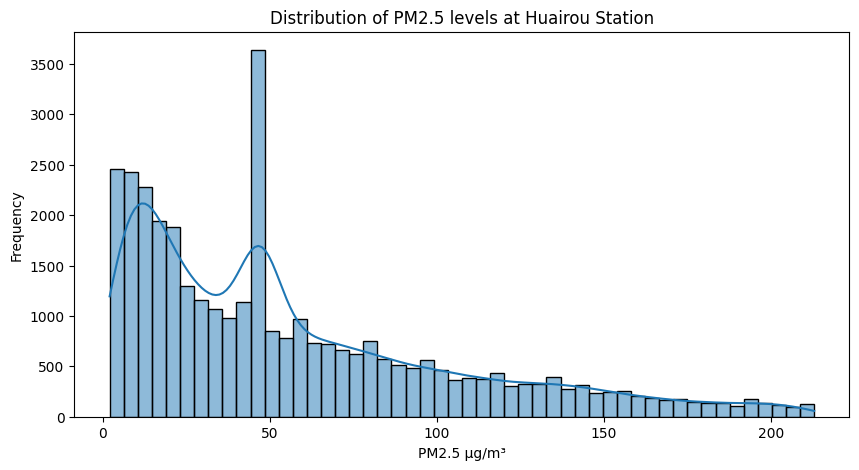

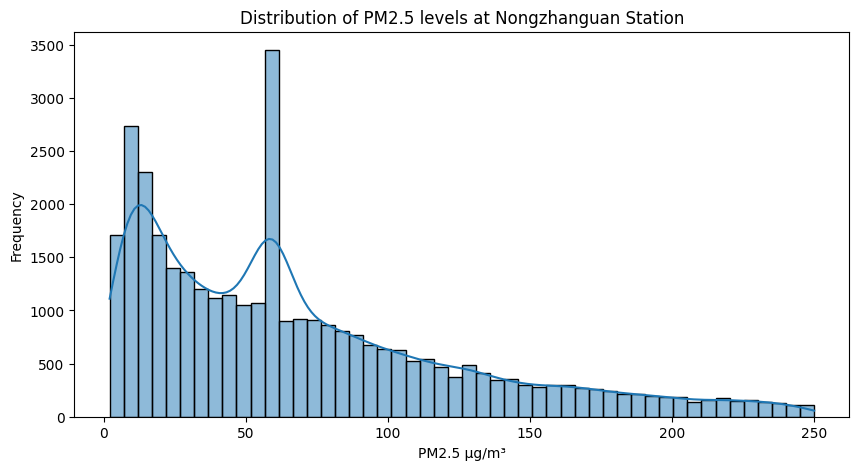

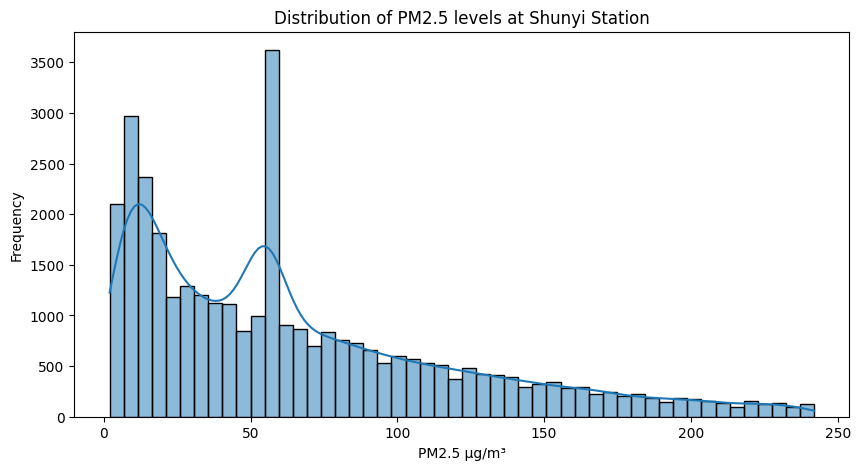

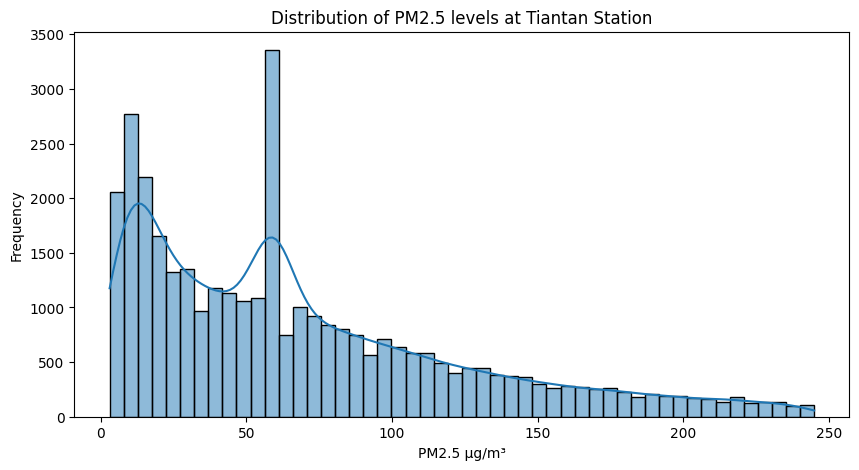

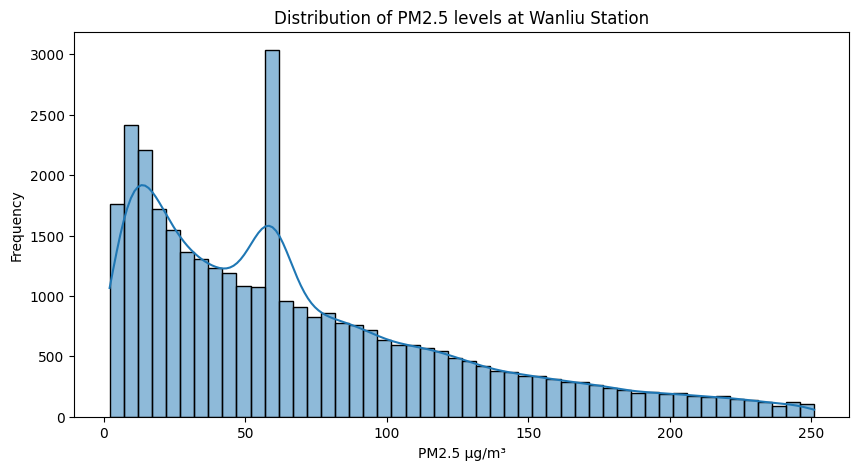

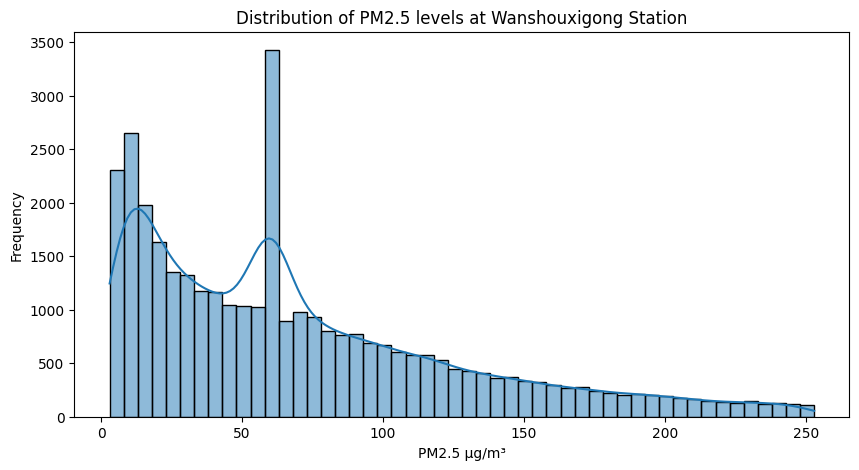

In [ ]:
for station, df in data_frames.items():
    plt.figure(figsize=(10, 5))
    sns.histplot(df['PM2.5'], bins=50, kde=True)
    plt.title(f'Distribution of PM2.5 levels at {station} Station')
    plt.xlabel('(PM2.5 (µg/m³)')
    plt.ylabel('Frequency')
    plt.show()

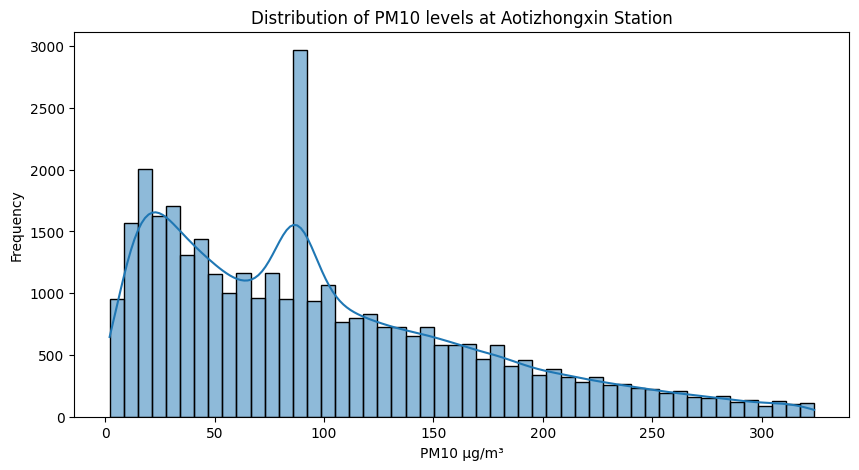

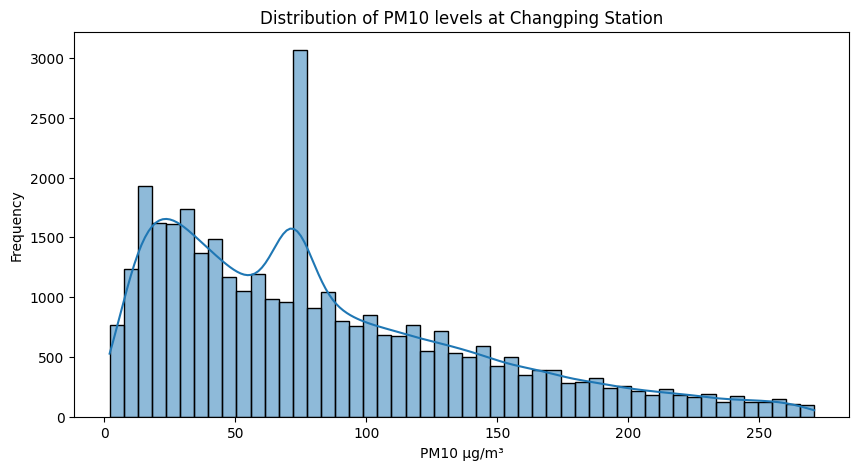

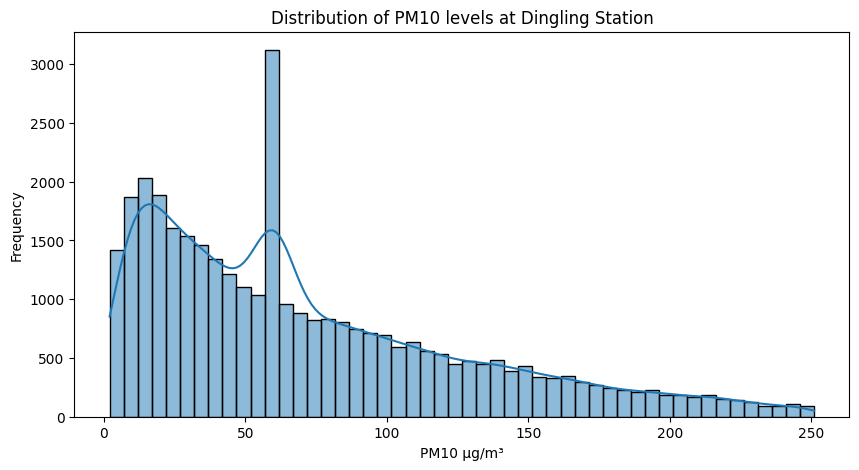

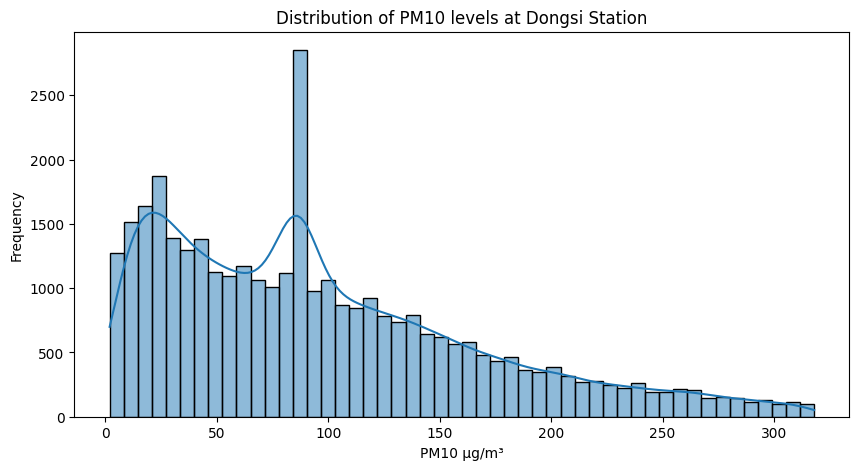

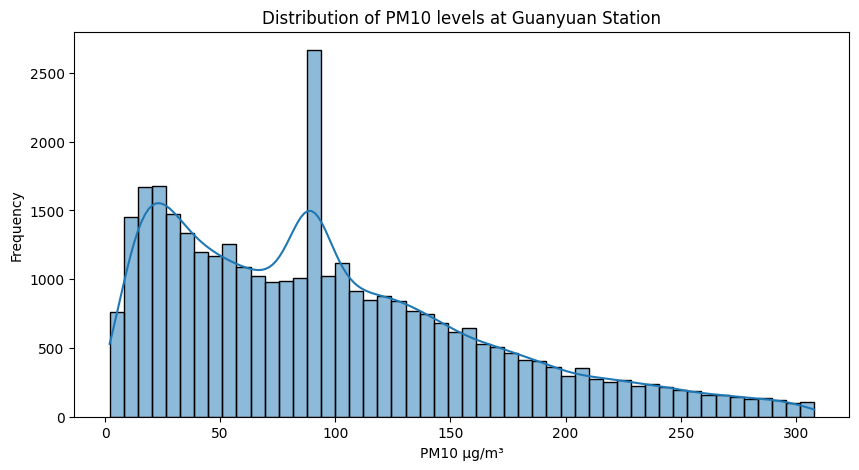

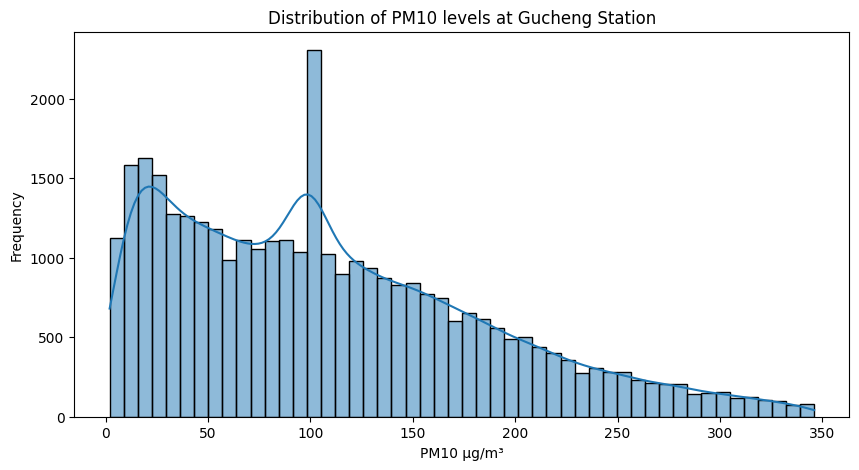

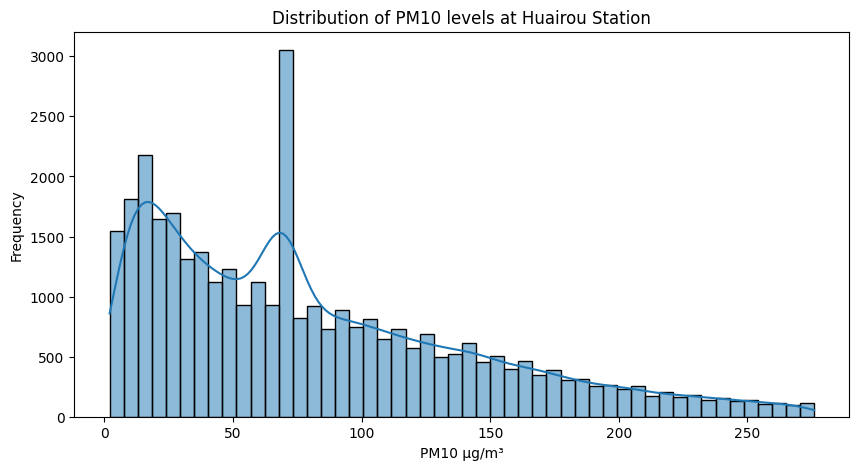

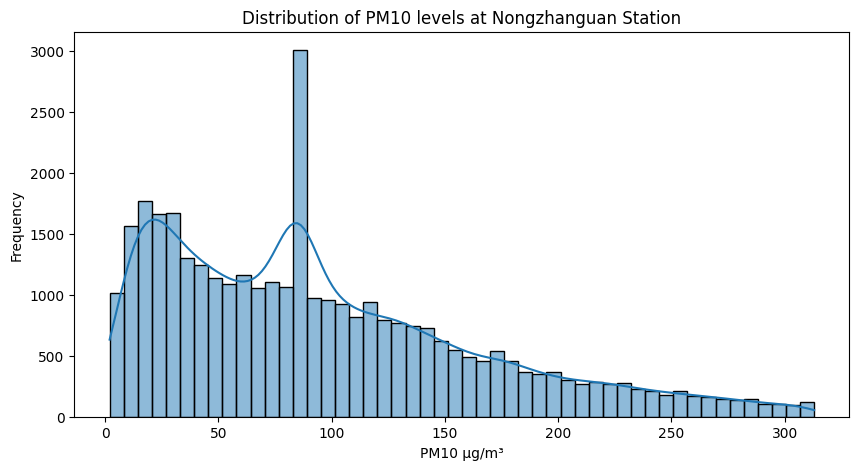

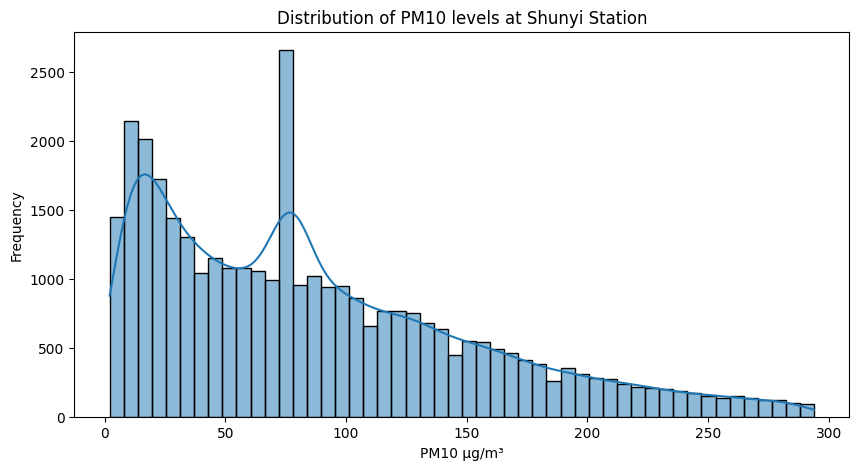

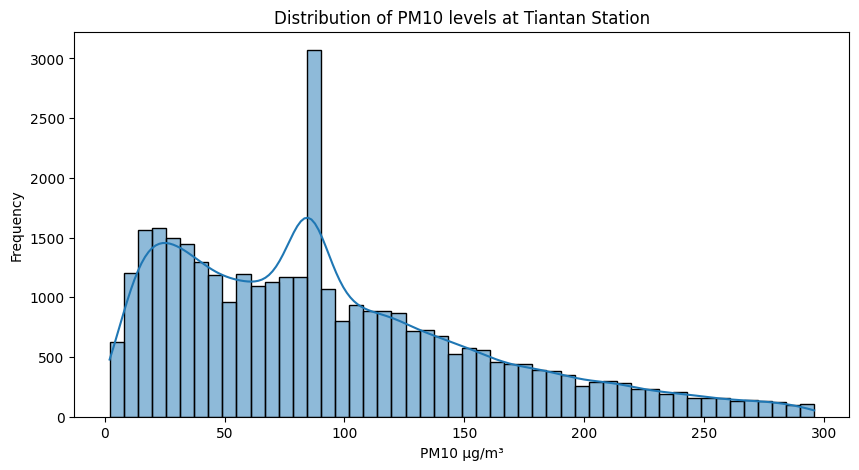

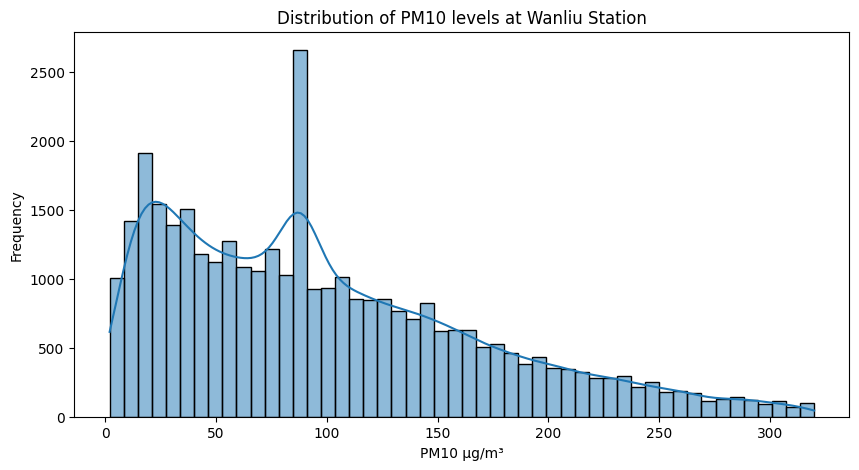

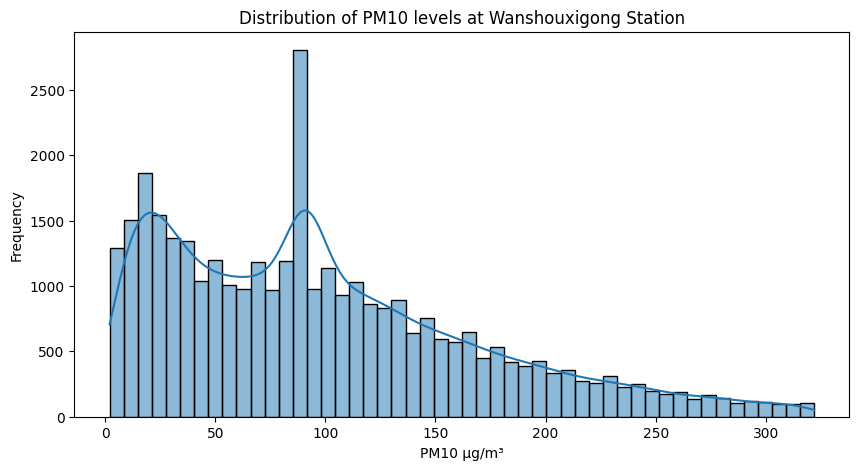

In [ ]:
for station, df in data_frames.items():
    plt.figure(figsize=(10, 5))
    sns.histplot(df['PM10'], bins=50, kde=True)
    plt.title(f'Distribution of PM10 levels at {station} Station')
    plt.xlabel('PM10 (µg/m³)')
    plt.ylabel('Frequency')
    plt.show()

**We make a correlation matrix to see if there is substantial evidence for question number 2**

<ipython-input-22-5865b6375346>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_frames[first_station].corr(), annot=True, fmt='.2f', cmap='coolwarm')


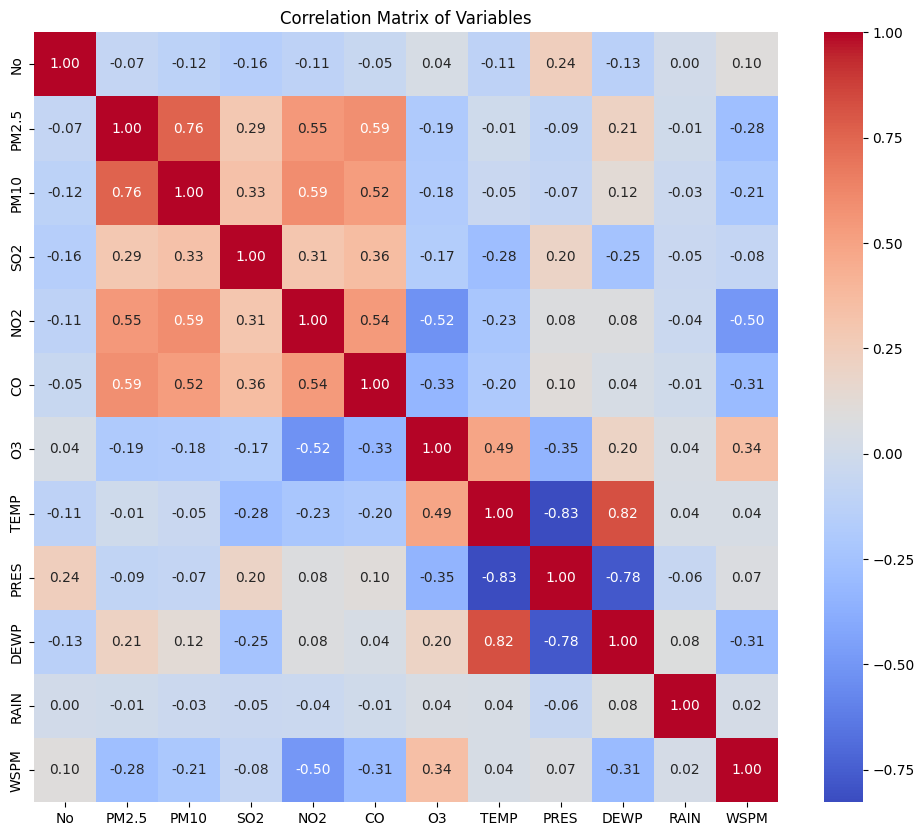

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_frames[first_station].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

This is a monthly average for the PM levels to see which year has the highest PM level.

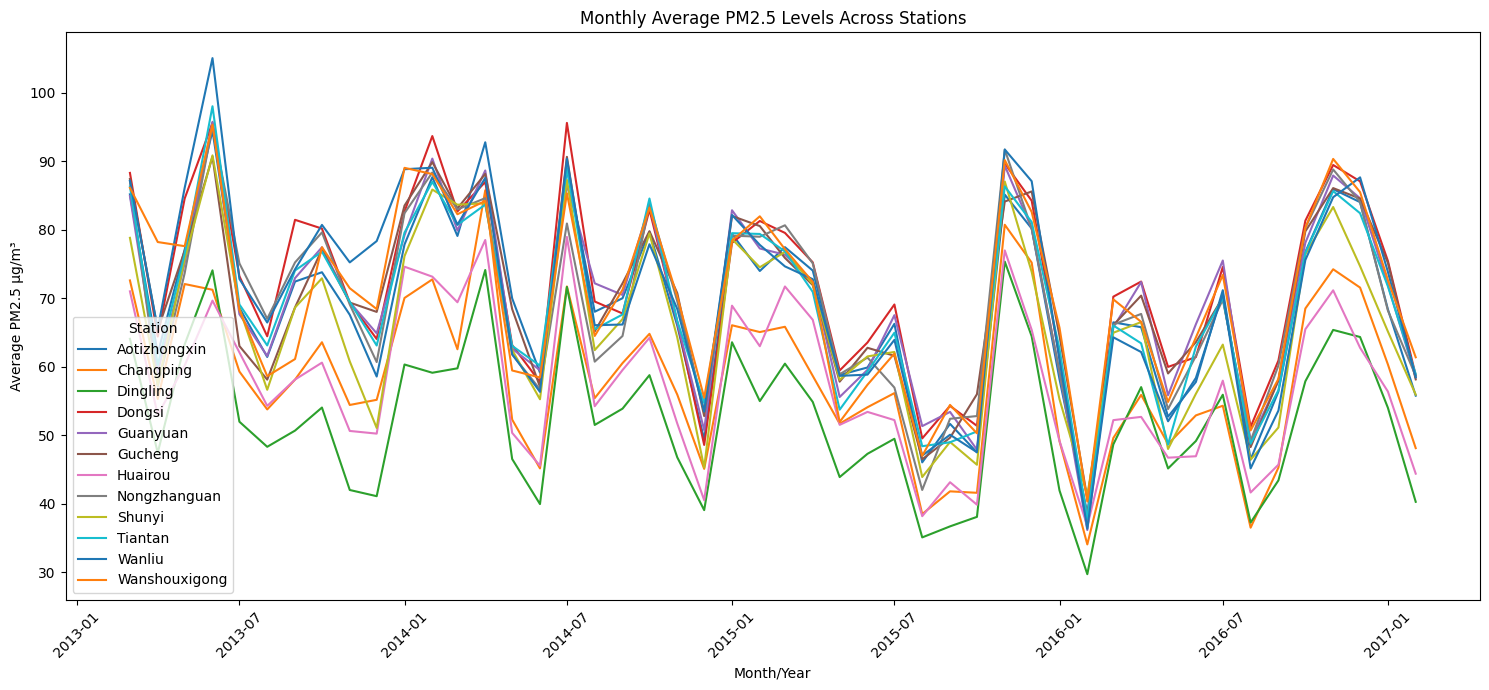

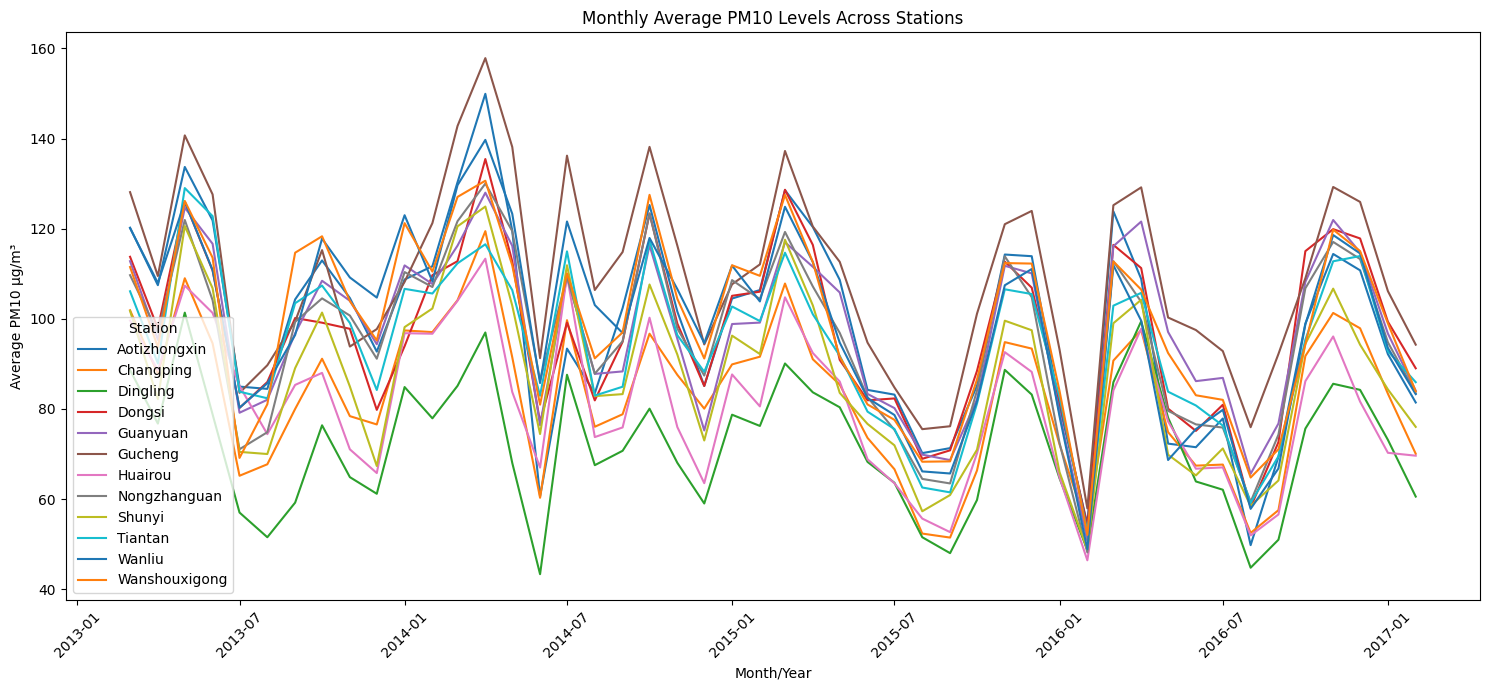

In [ ]:
def plot_monthly_average(data_frames, pollutant):
    if pollutant not in ['PM2.5', 'PM10']:
        raise ValueError("That's a negatory, it's a fake pollutant")

    plt.figure(figsize=(15, 7))

    for station, df in data_frames.items():
        if 'month_year' not in df.columns:
            df['month_year'] = df['date_time'].dt.to_period('M')

        monthly_avg = df.groupby('month_year')[pollutant].mean().sort_index()
        sns.lineplot(x=monthly_avg.index.to_timestamp(), y=monthly_avg.values, label=station)

    plt.title(f'Monthly Average {pollutant} Levels Across All Stations')
    plt.xlabel('Month/Year')
    plt.ylabel(f'Average {pollutant} (µg/m³)')
    plt.legend(title='Stations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_monthly_average(data_frames, 'PM2.5')
plot_monthly_average(data_frames, 'PM10')


### Pertanyaan 2:

Feel free to change the parameter. It's date and the scatterplot. This shows correlation between two parameters, as requested by the 2nd question.

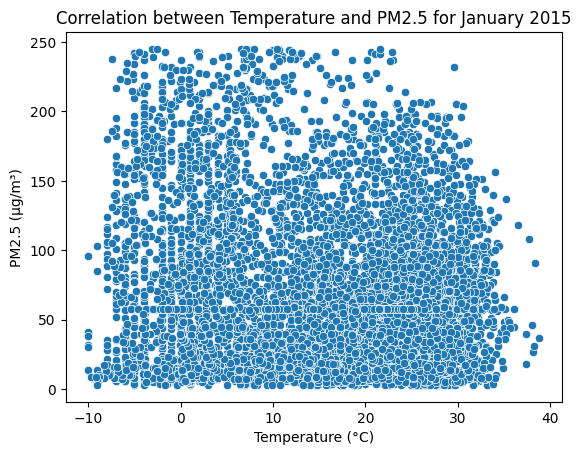

The correlation coefficient between temperature and PM2.5 for January 2015 is: -0.10194570782870774


In [38]:
specific_period_df = data_frames[first_station][(data_frames[first_station]['date_time'] >= '2015-01') & (data_frames[first_station]['date_time'] < '2015-12')]

sns.scatterplot(data=specific_period_df, x='TEMP', y='PM2.5')
plt.title('Correlation between Temperature and PM2.5 for January 2015')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

correlation = specific_period_df['TEMP'].corr(specific_period_df['PM2.5'])
print(f"The correlation coefficient between temperature and PM2.5 for January 2015 is: {correlation}")

## Conclusion

- It is evident that, in 2013, PM2.5 are at the highest, and in 2014, PM10 is the highest
- There is correlation between pollutants and the PM level on every yearly scale

# Glossary



*   PM = Particulate Matter (in μg/m3)

